<div class="alert alert-block alert-success">

**scLepr hypothalamus analysis**

Create scanpy objects

</div>

<div class="alert alert-block alert-info">

**What this notebook does**
    
This notebook takes the tsv files and performs the very first shaping of the datafile. At the end, a file with all hte cells ("allcells") and tdTomato cells ("tomcells") are generated. There is no actual preprocessing done at this point.

</div>  

<div class="alert alert-block alert-info">
    
**Background**

The **data** is retrived from single cell discoveries company and mapped using the starmap pipeline on the mm10. The total_coutt.tsv, which has the UMI-corrected and probability-scaled values, is used here. The gene names include the ENS and gene names. which are saved as seperate features here.

The **colnames** are imported seperately to exchange with the nmes in the count file. The spliced and unspliced versions of coutt should have the same number of columns (cells), even though in coutc where are missing columns.
</div> 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
data = './'
results_file = '../rawdata/Lepr_hypothalamus.h5ad'  # the file that will store the analysis results


scanpy==1.4.6 anndata==0.7.1 umap==0.4.0 numpy==1.17.2 scipy==1.4.1 pandas==0.25.1 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.7.1


In [2]:
sc.settings.set_figure_params(dpi=80)

import the dataset using the 'coutt' count files, merged from four plates

In [3]:
dataset = sc.read('../rawdata/merged_starmap_Nef_cellsrenamed_total.coutt.tsv')

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [4]:
adata = dataset.T
adata

AnnData object with n_obs × n_vars = 1920 × 36146 

In [5]:
adata.var

""
ENSMUSG00000000001_Gnai3__protein_coding__3
ENSMUSG00000000028_Cdc45__protein_coding__16
ENSMUSG00000000031_H19__lincRNA__7
ENSMUSG00000000037_Scml2__protein_coding__X
ENSMUSG00000000049_Apoh__protein_coding__11
...
ERCC-00164__spikein__ERCC-00164
ERCC-00165__spikein__ERCC-00165
ERCC-00168__spikein__ERCC-00168
ERCC-00170__spikein__ERCC-00170


###### Let's add some metrics to the dataset

In [6]:
# Set the ERCC_ratio as a category, then remove the ERCC genes
ERCC_genes = adata.var_names.str.startswith('ERCC')
adata.obs['ERCC_genes'] = np.sum(
    adata[:, ERCC_genes].X, axis=1) / np.sum(adata.X, axis=1) #.A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts_withERCCmito'] = adata.X.sum(axis=1) #.A1

###### Use the variable names to generate the index as well as new features in .var slot

In [7]:
adata.var['fullname'] = adata.var_names
adata.var['ENS_names'] = adata.var_names.str.split('_').str[0]
adata.var['geneid'] = adata.var_names.str.split('_').str[1]
adata.var['feature'] = adata.var_names.str.split('__').str[1]
adata.var['chr'] = adata.var_names.str.split('__').str[2]

#Calculate number of genes
sc.pp.filter_cells(adata, min_genes=0)

In [8]:
#some averages...
print(np.median(adata.obs['n_counts_withERCCmito']), "median number of reads with ERCC per cell")
print(np.median(adata.obs['n_genes']), "median number of genes per cell")
#print(np.median(adata.obs['percent_mito']), "median mito_genes/total")
print(np.median(adata.obs['ERCC_genes']), 'median % are ERCC_genes')

8244.328 median number of reads with ERCC per cell
2779.5 median number of genes per cell
0.30421558 median % are ERCC_genes


###### Exclude the ERCC genes from downstream analysis

In [9]:
non_ERCC_genes_list = [name for name in adata.var_names if not name.startswith('ERCC')]
adata_no_ERCC_genes = adata[:, non_ERCC_genes_list] #
adata_no_ERCC_genes

View of AnnData object with n_obs × n_vars = 1920 × 36054 
    obs: 'ERCC_genes', 'n_counts_withERCCmito', 'n_genes'
    var: 'fullname', 'ENS_names', 'geneid', 'feature', 'chr'

In [10]:
adata = adata_no_ERCC_genes.copy()
del adata_no_ERCC_genes

In [11]:
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts_with_mito'] = adata.X.sum(axis=1) #.A1

Trying to set attribute `.obs` of view, copying.


A simple initial filtering to get rid of cells with 0 total values

In [12]:
sc.pp.filter_cells(adata, min_genes=10)

filtered out 50 cells that have less than 10 genes expressed


Calculate the % of mitocondrial genes

In [13]:
mito_genes = adata.var_names.str.endswith('MT')# adata.var_names["mitochondrial"]
# for each cell compute fraction of counts in mito genes vs. all genes...
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1) #.A1

###### Now remove the mito genes so that they dont effect downstream analysis

In [14]:
non_mito_genes_list = [name for name in adata.var_names if not name.endswith('MT')]
adata_no_mito_genes = adata[:, non_mito_genes_list] #mito_genes = adata.var_names.str.endswith('M')
adata_no_mito_genes

View of AnnData object with n_obs × n_vars = 1870 × 36019 
    obs: 'ERCC_genes', 'n_counts_withERCCmito', 'n_genes', 'n_counts_with_mito', 'percent_mito'
    var: 'fullname', 'ENS_names', 'geneid', 'feature', 'chr'

In [15]:
adata = adata_no_mito_genes.copy()
del adata_no_mito_genes
## add number of genes
adata.obs['n_counts'] = adata.X.sum(axis=1) #.A1

Trying to set attribute `.obs` of view, copying.


Here, we will readjust the feature names

In [16]:
adata.var_names = adata.var_names.str.split('_').str[1]

In [17]:
adata.var_names_make_unique()  # this is unnecessary if using 'gene_ids'

Calculate ribosomal gene %

In [18]:
#ribo
percent_ribo = adata.var_names.str.startswith('Rp')
adata.obs['percent_ribo'] = np.sum(
    adata[:, percent_ribo].X, axis=1) / np.sum(adata.X, axis=1) #.A1


In [19]:
#add the % of protein coding genes 
# Once .raw is this, this can be used to calculate as well
#protein_coding_names = adata.raw.var_names[adata.raw.var['feature'] == 'protein_coding']
adata.obs['percent_coding'] = np.sum(
    adata.X[:,adata.var['feature'] == 'protein_coding'], axis=1) / np.sum(adata.X, axis=1) #.A1

#add the % of lincRNA genes 
#lincRNA_names = adata.raw.var_names[adata.raw.var['feature'] == 'lincRNA']
adata.obs['percent_lincRNA'] = np.sum(
    adata.X[:,adata.var['feature'] == 'lincRNA'], axis=1) / np.sum(adata.X, axis=1)
adata.obs['sum_lincRNA'] = np.sum(
    adata.X[:,adata.var['feature'] == 'lincRNA'], axis=1) 

#add the % of antisense genes 
#antisense_names = adata.raw.var_names[adata.raw.var['feature'] == 'antisense']
adata.obs['percent_antisense'] = np.sum(
    adata.X[:,adata.var['feature'] == 'antisense'], axis=1) / np.sum(adata.X, axis=1)
adata.obs['sum_antisense'] = np.sum(
    adata.X[:,adata.var['feature'] == 'antisense'], axis=1) 

#add the % of antisense genes 
#miRNA_names = adata.raw.var_names[adata.raw.var['feature'] == 'miRNA']
adata.obs['percent_miRNA'] = np.sum(
    adata.X[:,adata.var['feature'] == 'miRNA'], axis=1) / np.sum(adata.X, axis=1) #.A1
adata.obs['sum_miRNA'] = np.sum(
    adata.X[:,adata.var['feature'] == 'miRNA'], axis=1)

#add the % of antisense genes 
#bidirectional_promoter_lncRNA_names = adata.raw.var_names[adata.raw.var['feature'] == 'bidirectional_promoter_lncRNA']
adata.obs['percent_bidirectional_promoter_lncRNA'] = np.sum(
    adata.X[:,adata.var['feature'] == 'bidirectional_promoter_lncRNA'], axis=1) / np.sum(adata.X, axis=1) #.A1
adata.obs['sum_bidirectional_promoter_lncRNA'] = np.sum(
    adata.X[:,adata.var['feature'] == 'bidirectional_promoter_lncRNA'], axis=1) 

#snoRNA_names = adata.raw.var_names[adata.raw.var['feature'] == 'snoRNA']
adata.obs['percent_snoRNA'] = np.sum(
    adata.X[:,adata.var['feature'] == 'snoRNA'], axis=1) / np.sum(adata.X, axis=1) #.A1

#pseudogene
#misc_RNA
#sense_intronic
#sense_overlapping
#rRNA
#ribozyme
#transcribed_unprocessed_pseudogene
#transcribed_unitary_pseudogene
#transcribed_processed_pseudogene
#unprocessed_pseudogene
#unitary_pseudogene

Calculate number of genes

In [20]:
sc.pp.filter_cells(adata, min_genes=0)

some averages...

In [21]:
print(np.median(adata.obs['ERCC_genes']), 'median % are ERCC_genes before filtering')
print(np.median(adata.obs['percent_mito']), "median mito_genes/total before filtering, without ERCC")
print(np.median(adata.obs['n_counts_withERCCmito']), "median number of reads with ERCC per cell")
print(np.median(adata.obs['n_counts_with_mito']), "median number of reads without ERCC per cell")
print(np.median(adata.obs['n_counts']), "median number of reads per cell, without ERCC and mito")
print(np.median(adata.obs['percent_ribo']), "median percent of ribosomal genes per cell")
print(np.median(adata.obs['n_genes']), "median number of genes per cell, without ERCC and mito")
print(np.median(adata.obs['percent_coding']), "median percent of protein_coding genes per cell")
print(np.median(adata.obs['percent_lincRNA']), "median percent of lincRNA genes per cell")
print(np.median(adata.obs['percent_antisense']), "median percent of antisense genes per cell")
print(np.median(adata.obs['percent_miRNA']), "median percent of miRNA genes per cell")
print(np.median(adata.obs['percent_bidirectional_promoter_lncRNA']), "median percent of bidirectional_promoter_lncRNA genes per cell")
print(np.median(adata.obs['percent_snoRNA']), "median percent of snoRNA genes per cell")
print(np.median(adata.obs['sum_miRNA']), "median or total miRNA genes per cell")
print(np.median(adata.obs['sum_antisense']), "median or total miRNA genes per cell")
print(np.median(adata.obs['sum_lincRNA']), "median or total miRNA genes per cell")


0.2927072 median % are ERCC_genes before filtering
0.06912528 median mito_genes/total before filtering, without ERCC
8702.39 median number of reads with ERCC per cell
5896.424 median number of reads without ERCC per cell
5409.802 median number of reads per cell, without ERCC and mito
0.013186138 median percent of ribosomal genes per cell
2797.5 median number of genes per cell, without ERCC and mito
0.95336473 median percent of protein_coding genes per cell
0.01491335 median percent of lincRNA genes per cell
0.0035156254 median percent of antisense genes per cell
0.0017329719 median percent of miRNA genes per cell
0.00043705007 median percent of bidirectional_promoter_lncRNA genes per cell
0.0 median percent of snoRNA genes per cell
9.002443 median or total miRNA genes per cell
24.001465 median or total miRNA genes per cell
87.08482 median or total miRNA genes per cell


set cell types for plots using the column names

In [22]:
adata.obs['type'] = adata.obs_names.str.split('_').str[0]
adata.obs['plate'] = adata.obs_names.str.split('_').str[1]
adata.obs['condition'] = adata.obs_names.str.split('_').str[2]

In [23]:
adata.obs_names

Index(['tom_P1_fed_1', 'tom_P1_fed_2', 'tom_P1_fed_3', 'tom_P1_fed_4',
       'tom_P1_fed_5', 'tom_P1_fed_6', 'tom_P1_fed_7', 'tom_P1_fed_8',
       'tom_P1_fed_9', 'tom_P1_fed_10',
       ...
       'emp_P5_fed_373', 'emp_P5_fed_374', 'emp_P5_fed_375', 'emp_P5_fed_376',
       'emp_P5_fed_377', 'emp_P5_fed_378', 'emp_P5_fed_379', 'emp_P5_fed_381',
       'emp_P5_fed_383', 'emp_P5_fed_384'],
      dtype='object', length=1870)

## Clean-up: Get rid of Malat1, note down stats about the X and Y chromosome genes
We will get rid of these later at the highly variable genes stage

In [24]:
adata = adata[:,adata.var_names != 'Malat1']

In [25]:
adata

View of AnnData object with n_obs × n_vars = 1870 × 36018 
    obs: 'ERCC_genes', 'n_counts_withERCCmito', 'n_genes', 'n_counts_with_mito', 'percent_mito', 'n_counts', 'percent_ribo', 'percent_coding', 'percent_lincRNA', 'sum_lincRNA', 'percent_antisense', 'sum_antisense', 'percent_miRNA', 'sum_miRNA', 'percent_bidirectional_promoter_lncRNA', 'sum_bidirectional_promoter_lncRNA', 'percent_snoRNA', 'type', 'plate', 'condition'
    var: 'fullname', 'ENS_names', 'geneid', 'feature', 'chr'

In [26]:
adata.obs['chrY_counts'] = adata[:,adata.var['chr'] == 'Y'].X.sum(axis=1) #.A1
adata.obs['chrX_counts'] = adata[:,adata.var['chr'] == 'X'].X.sum(axis=1) #.A1

Trying to set attribute `.obs` of view, copying.


... storing 'type' as categorical
... storing 'plate' as categorical
... storing 'condition' as categorical
... storing 'geneid' as categorical
... storing 'feature' as categorical
... storing 'chr' as categorical


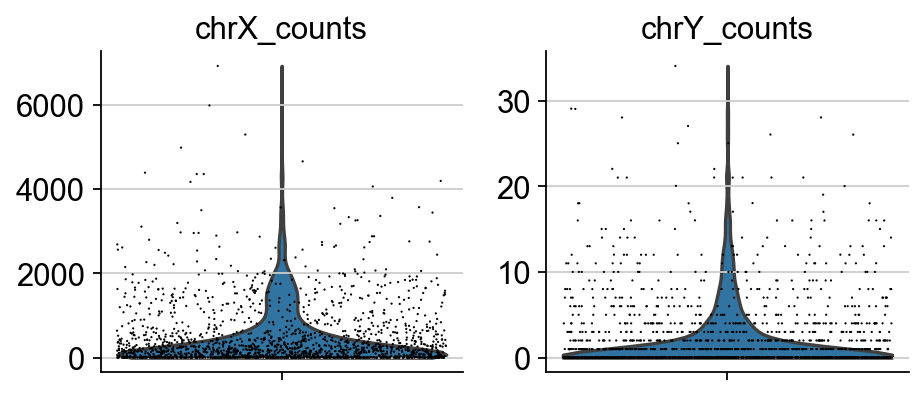

In [27]:
sc.pl.violin(adata, ['chrX_counts', 'chrY_counts'],
             jitter=0.4, multi_panel=True,save="sex_chr_counts_allcells.pdf")

## Subset tdTomato+ cells for downstream analysis

In [28]:
adata_tomcells = adata[adata.obs_names.str.startswith('tom'),:]

In [29]:
print(adata_tomcells.n_vars)
print(adata_tomcells.obs_names)
print(adata_tomcells.var_names)

36018
Index(['tom_P1_fed_1', 'tom_P1_fed_2', 'tom_P1_fed_3', 'tom_P1_fed_4',
       'tom_P1_fed_5', 'tom_P1_fed_6', 'tom_P1_fed_7', 'tom_P1_fed_8',
       'tom_P1_fed_9', 'tom_P1_fed_10',
       ...
       'tom_P5_fasted_238', 'tom_P5_fasted_239', 'tom_P5_fasted_241',
       'tom_P5_fasted_242', 'tom_P5_fasted_243', 'tom_P5_fasted_244',
       'tom_P5_fasted_245', 'tom_P5_fasted_246', 'tom_P5_fasted_247',
       'tom_P5_fasted_248'],
      dtype='object', length=1269)
Index(['Gnai3', 'Cdc45', 'H19', 'Scml2', 'Apoh', 'Narf', 'Cav2', 'Klf6',
       'Scmh1', 'Cox5a',
       ...
       'AC154242.1', 'CT030713.2', 'AC150035.3', 'AC164314.2', 'AC109255.2',
       'AC135964.2', 'AC110534.5', 'CT030736.1', 'AC109266.1', 'AC154275.2'],
      dtype='object', length=36018)


A violin plot of the computed quality measures.

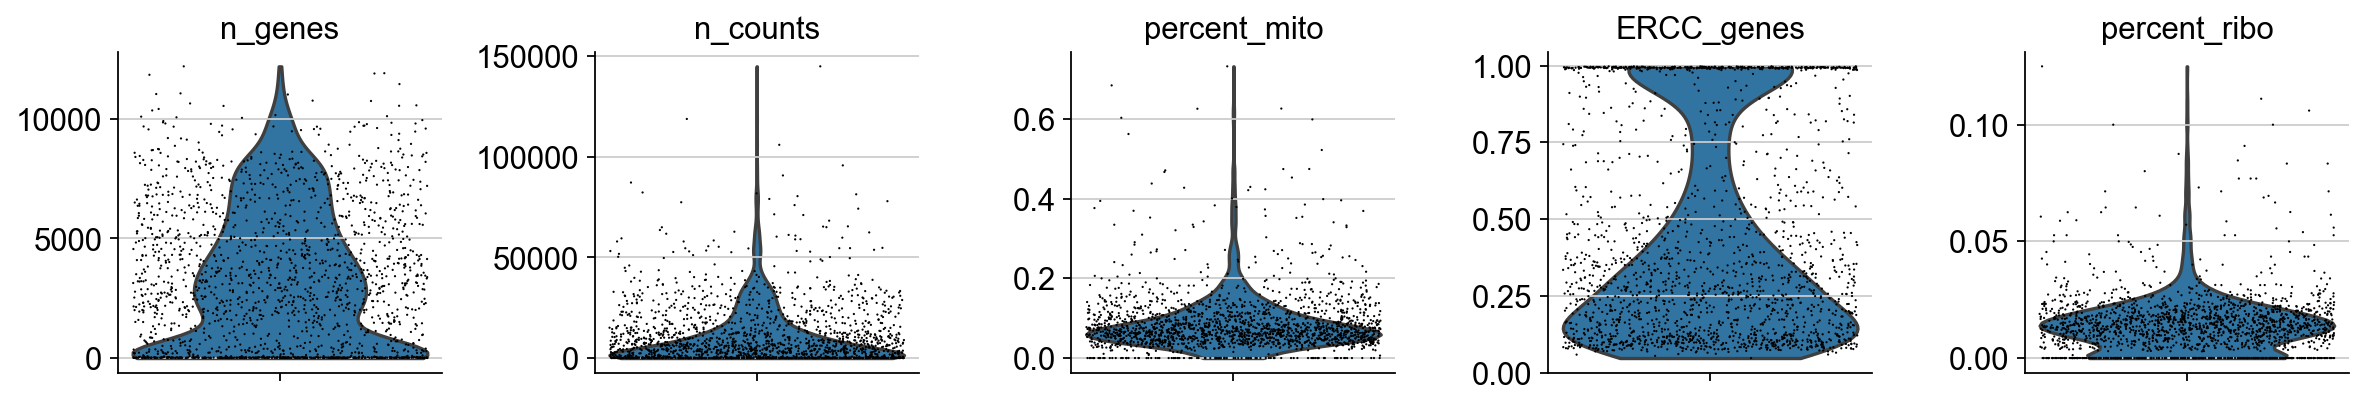

In [30]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito','ERCC_genes','percent_ribo'],
             jitter=0.4, multi_panel=True,save="quality_measures_prefilter_allcells.pdf")

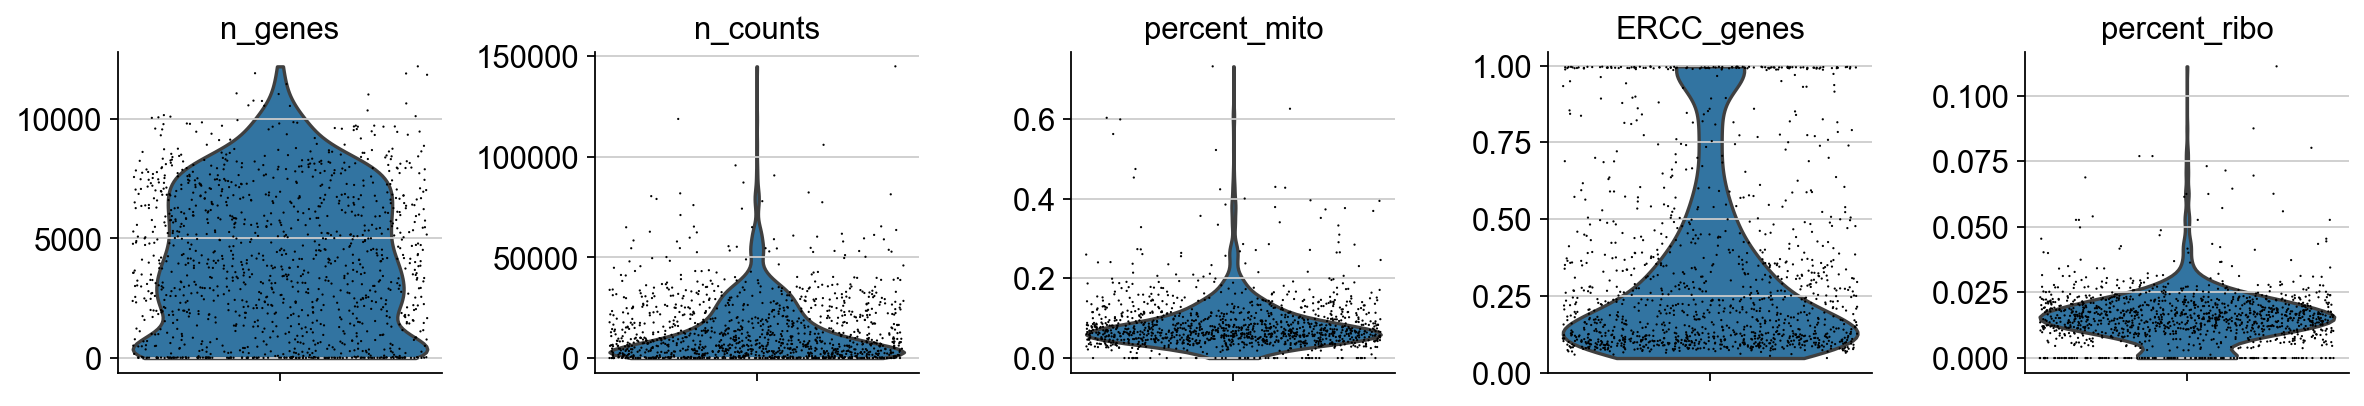

In [31]:
sc.pl.violin(adata_tomcells, ['n_genes', 'n_counts', 'percent_mito','ERCC_genes','percent_ribo'],
             jitter=0.4, multi_panel=True,save="quality_measures_prefilter_tomcells.pdf")

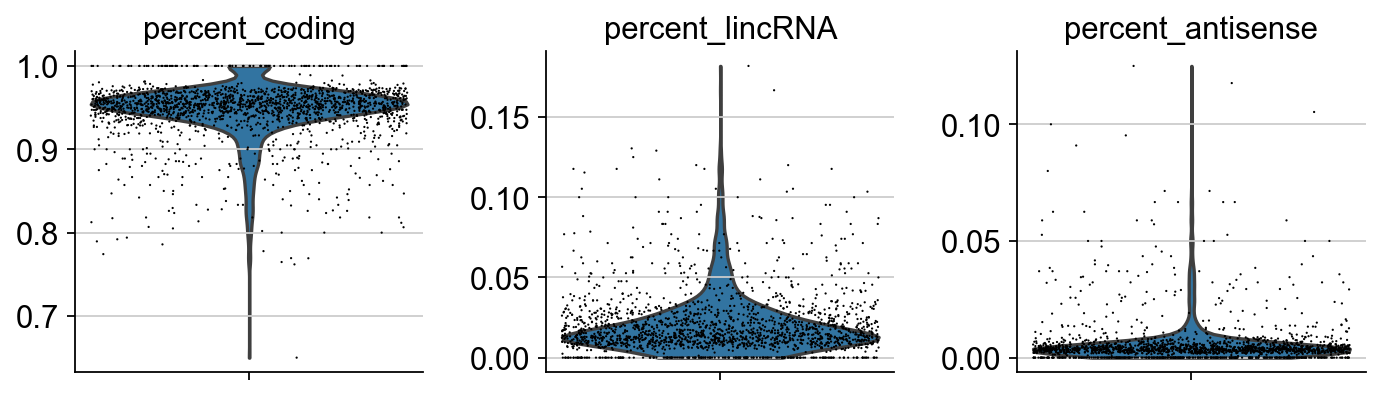

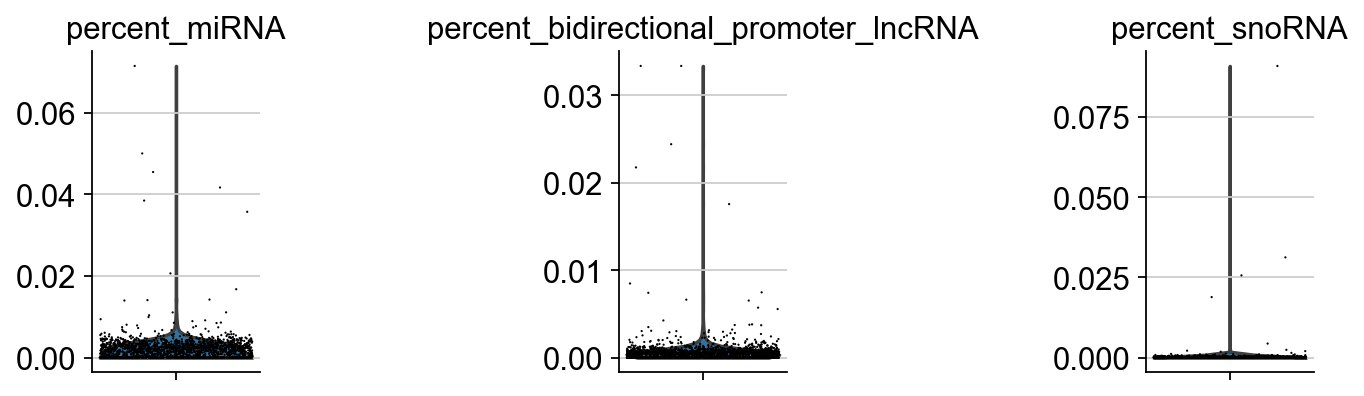

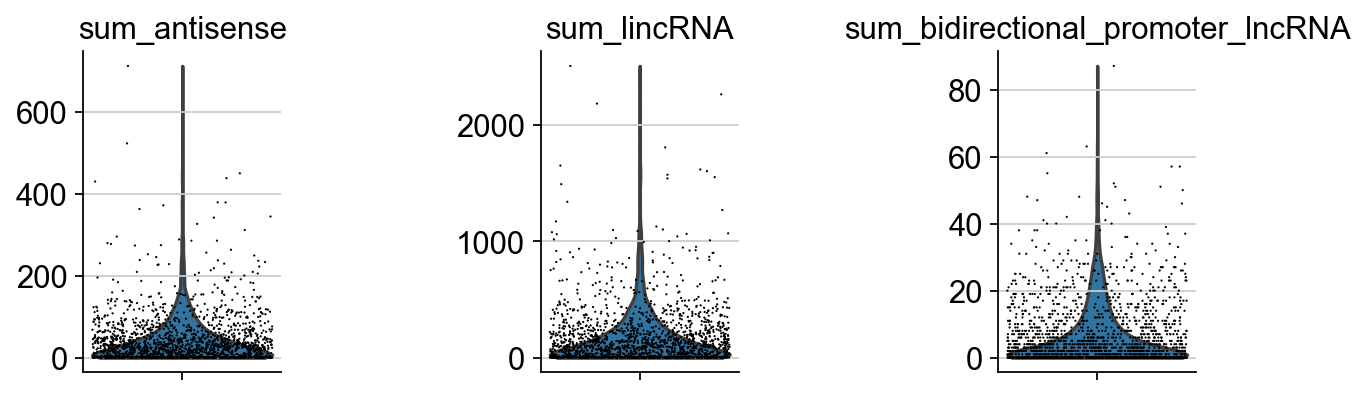

In [32]:
sc.pl.violin(adata, ['percent_coding', 'percent_lincRNA', 'percent_antisense'],
             jitter=0.4, multi_panel=True,save="features_prefilter_1_allcells.pdf")
sc.pl.violin(adata, [ 'percent_miRNA', 'percent_bidirectional_promoter_lncRNA', 'percent_snoRNA'],
             jitter=0.4, multi_panel=True,save="features_prefilter_2_allcells.pdf")
sc.pl.violin(adata, ['sum_antisense', 'sum_lincRNA', 'sum_bidirectional_promoter_lncRNA'],
             jitter=0.4, multi_panel=True,save="features_prefilter_3_allcells.pdf")



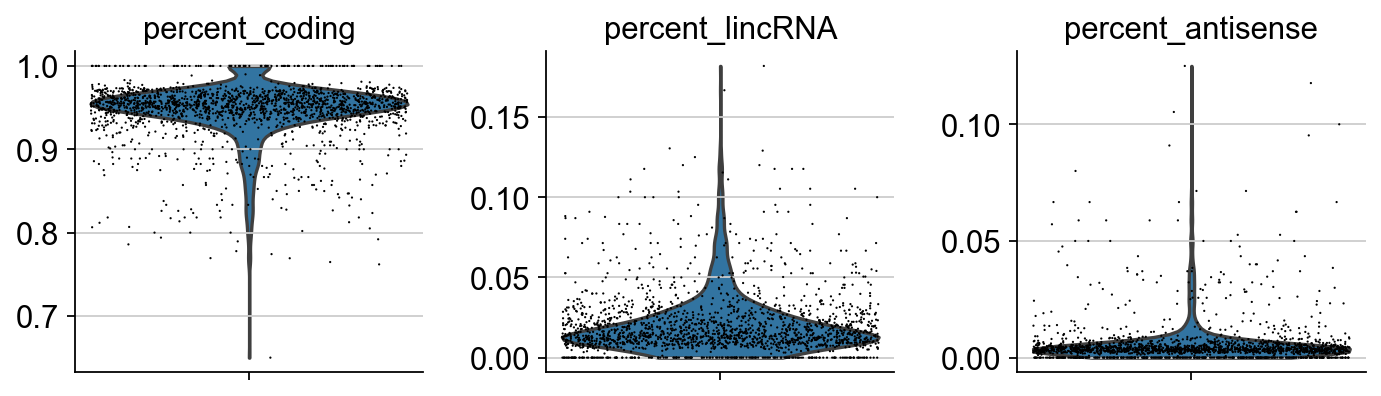

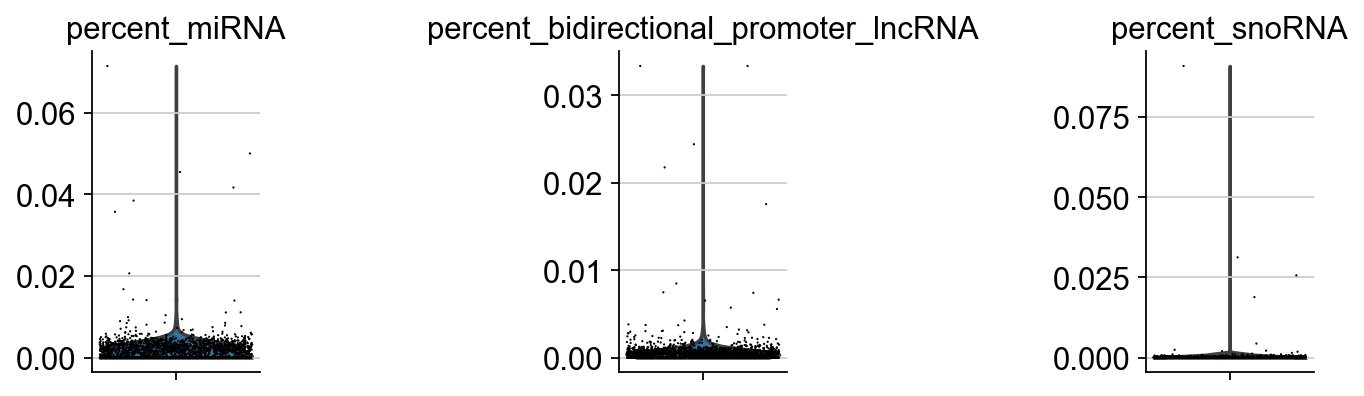

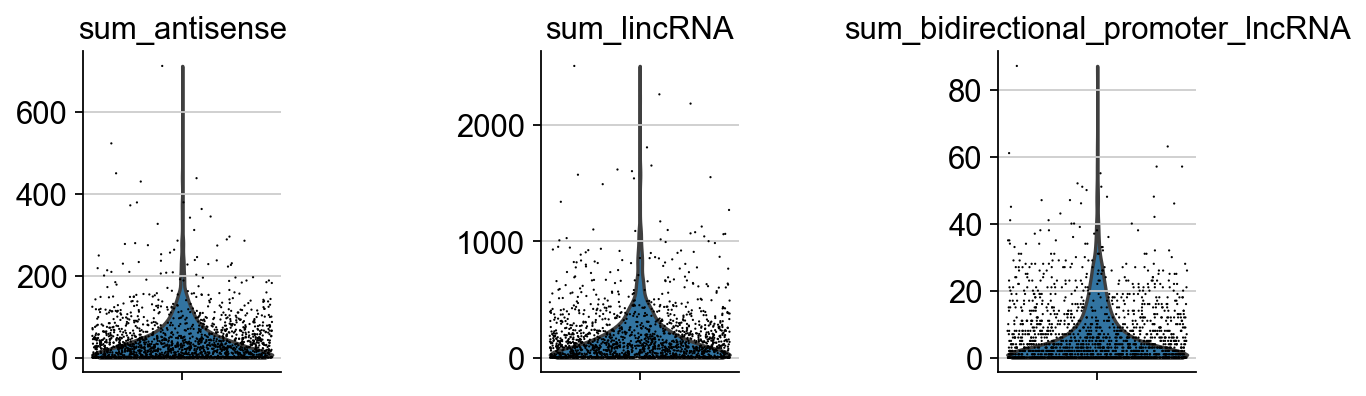

In [33]:
sc.pl.violin(adata, ['percent_coding', 'percent_lincRNA', 'percent_antisense'],
             jitter=0.4, multi_panel=True,save="features_prefilter_1_tomcells.pdf")
sc.pl.violin(adata, [ 'percent_miRNA', 'percent_bidirectional_promoter_lncRNA', 'percent_snoRNA'],
             jitter=0.4, multi_panel=True,save="features_prefilter_2_tomcells.pdf")
sc.pl.violin(adata, ['sum_antisense', 'sum_lincRNA', 'sum_bidirectional_promoter_lncRNA'],
             jitter=0.4, multi_panel=True,save="features_prefilter_3_tomcells.pdf")


<div class="alert alert-block alert-success">

Save the datasets for later use. Continute with 'Kakava_scLepr_preprocess.ipynb'
</div>    

In [34]:
adata.write('../rawdata/Lepr_hypothalamus_allcells.h5ad', compression='gzip')
adata_tomcells.write('../rawdata/Lepr_hypothalamus_tomcells.h5ad', compression='gzip')